# Identification des systèmes

## Introduction

L'identification d'un système consiste à déterminer un modèle mathématique basé sur les entrées et les sorties de ce système. Ce modèle mathématique doit, en principe, lorsqu'il est soumis aux mêmes entrées, répondre de manière équivalente au système.

Il existe différents types de modèles:

- modèles de connaissance: ces modèles sont déterminés grâce aux lois de la physique; ils sont utiles pour simuler précisément les comportements du système mais sont souvent trop complexes pour être utile à l'automaticien
- modèles de conduite: modèle utilisé pour simuler le système dans la plage de fonctionnement utile afin d'aider à la synthèse d'un régulateur

Un modèle peut donc être très différent en fonction des besoins.

En général, on essaie d'établir un modèle simple répondant à nos besoins. Les erreurs de modélisation (modes rapides négligés) et d'identification (erreurs sur le gain, le retard pur...) seront généralement absorbées par la boucle de régulation, d'où l'importance de la robustesse en pratique.

Il existe deux types de méthodes d'identification:

- non paramétrique: le modèle est décrit sous forme de courbe et n'est pas représentable par un ensemble fini de nombres
- paramétrique: le modèle est décrit par un ensemble fini de points (ex: fonction de transfert décrite par les coefficients du numérateur et du dénominateur)

Dans ce chapitre, nous n'étudierons que les méthodes d'identification paramétriques pouvant se mettre sous la forme d'une régression linéaire.

## Prétraitement des signaux

Afin d'effectuer l'identification dans de bonnes conditions, il convient de faire attention aux éléments suivants:

- l'échantillonnage: pour les mêmes raisons que précédemment, la période d'échantillonnage sera choisie telle que $h = T_{95\%}/N$ avec $30 < N < 60$
- filtre antirepliement: il est choisi de telle manière à respecter le théorème de Shannon, soit $\omega_c < 2/h$
- filtrage de la composante continue: le modèle à identifier étant obtenu par la comparaison entre les variations en sortie et en entrée, il est recommandé de filtrer la composante continue via un changement de variable, ou d'utiliser un filtre passe-haut afin de ne garder que les variations
- filtrage des bruits de mesure: si, malgré le filtre antirepliement, le bruit de mesure est toujours présent, il convient d'ajouter un filtre passe-bas de constante de temps $\tau = T_{95\%}/9$

## Classes de modèles

Il existe différentes classes de modèles *standards* pour l'identification. On peut citer, par exemple:

- les modèles sous forme de fonctions de transfert
- les modèles d'état
- les modèles à paramètres distribués

Nous étudierons principalement les modèles représentés par des fonctions de transfert au vu du contenu des chapitres précédents.

De manière générale, les modèles représentés par des fonctions de transfert peuvent être représentés par le schéma général suivant:

![Modèles sous forme de fonctions de transfert](Images/Chapter11/LTI_models.png)

Le modèle représente:

- le processus à identifier reçoit le signal $U(z)$ et renvoie le signal $Y(z)$
- $G(z)$ représente le processus physique dont $\hat{Y}(z)$ est une estimation
- $E(z)$ représente une perturbation; elle est souvent prise comme un bruit blanc aléatoire
- $H(z)$ est la dynamique de la perturbation; elle permet de mieux identifier les perturbations agissant sur le processus

Voici quelques classes importantes de modèles de cette catégorie.

### Modèle ARX

Le modèle ARX est décrit par l'équation suivante:

$$ y(k) + a_1 y(k-1) + \cdots + a_n y(k-n) = b_1 u(k-1) + \cdots + b_m u(k-m) + e(k) $$

Il représente une équation aux différences entre la sortie et l'entrée, avec un terme représentant l'erreur d'équation.

Il peut être mis sous la forme suivante:

$$Y(z) = \frac{B(z)}{A(z)} U(z) + \frac{1}{A(z)} E(z)$$

### Modèle ARMAX

Le modèle ARMAX est décrit par l'équation suivante:

$$ y(k) + a_1 y(k-1) + \cdots + a_n y(k-n) = b_1 u(k-1) + \cdots + b_m u(k-m) + e(k) + c_1 e(k-1) + \cdots + c_n e(k-l)$$

Il représente une équation aux différences entre la sortie et l'entrée, avec plusieurs termes représentant une moyenne ajustée de la perturbation.

Il peut être mis sous la forme suivante:

$$Y(z) = \frac{B(z)}{A(z)} U(z) + \frac{C(z)}{A(z)} E(z)$$

On peut aussi, en modifiant les termes $U(z)$ et $Y(z)$ par leur différence, ajouter une intégration au modèle. Ce dernier est alors appelé ARIMAX.

Ce modèle, ajoutant de la flexibilité dans la description des perturbations par rapport au modèle ARX, est devenu le standard le plus utilisé pour le contrôle et l'économétrie (branche étudiant les modèles en économie).

### Modèle de Box-Jenkins

Le modèle de Box-Jenkins est décrit par l'équation suivante:

$$Y(z) = \frac{B(z)}{A(z)} U(z) + \frac{C(z)}{A(z)} E(z)$$

Ce modèle est très complet car il sépare entièrement la dynamique du processus de la dynamique de la perturbation.

## Régression linéaire

La régression linéaire est définie par l'équation vectorielle suivante:

$$ y(k) = \phi (k) \vartheta + \varepsilon (k) $$

Dans cette équation, $y(k) \in \mathbb{R}^N$ est le vecteur de mesures, $\vartheta \in \mathbb{R}^p$ est le vecteur de paramètres et $\varepsilon (k) \in \mathbb{R}^N$ est le vecteur d'erreurs; $\phi (k) \in \mathbb{R}^{N \times p}$ est la matrice d'observations.

Cette équation, qui est une simple équation de droite lorsque la taille des vecteurs vaut 2, permet de modéliser une grande quantité de problèmes physiques.

#### Exemple 1
Prenons la fonction de transfert à identifier suivante:

$$ G(s) = \frac{\gamma}{\tau s + 1} $$

La réponse impulsionnelle fourni la sortie temporelle suivante:

$$ y(t) = \mathscr{L}^{-1} \left( G(s) \right) = \frac{\gamma}{\tau} e^{-\frac{t}{\tau}} $$

En passant par le logarithme, on obtient:

$$ \ln \left( \frac{\gamma}{\tau} e^{-\frac{t}{\tau}} \right) = -\frac{t}{\tau} + \ln \frac{\gamma}{\tau} $$

Cette dernière équation devient donc une droite avec:

- $y = \ln \left( \frac{\gamma}{\tau} e^{-\frac{t}{\tau}} \right)$
- $a = -\frac{1}{\tau}$
- $b = \ln \frac{\gamma}{\tau}$

En relevant suffisamment de points, on peut écrire la régression suivante:

$$
\left[
\begin{array}{ccc}
  \ln y(0) \\
  \ln y(h) \\
  \vdots \\
  \ln y(kh)
\end{array}
\right]
=
\left[
\begin{array}{ccc}
  0 & 1 \\
  h & 1 \\
  \vdots \\
  kh & 1
\end{array}
\right]
\times
\left[
\begin{array}{ccc}
  a \\
  b
\end{array}
\right]
$$

In [81]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('../my_params.mplstyle')

import math
import random

import control
from scipy import stats

In [119]:
gamma = 2.3
tau = 10.25

G = control.tf(gamma, [tau, 1])

time, yout = control.impulse_response(G, [i * 10 for i in range(10)])
    
y_ln = [math.log(y) for y in yout]

# add Box Muller noise to y
for i, y in enumerate(y_ln):
    x1, x2 = random.random(), random.random()
    z = math.sqrt(-2 * math.log(x1)) * math.cos(2 * math.pi * x2)
    
    k = 1  # change to 0.1, 0.01
    
    y_ln[i] += k * z
    
# compute linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(time, y_ln)

y_lsq = [slope * t + intercept for t in time]

gamma_lsq = - math.exp(intercept) / slope
tau_lsq = -1 / slope

print('Estimated gamma : {}'.format(gamma_lsq))
print('Estimated tau : {}'.format(tau_lsq))

Estimated gamma : 2.276528068076745
Estimated tau : 9.656316543208929


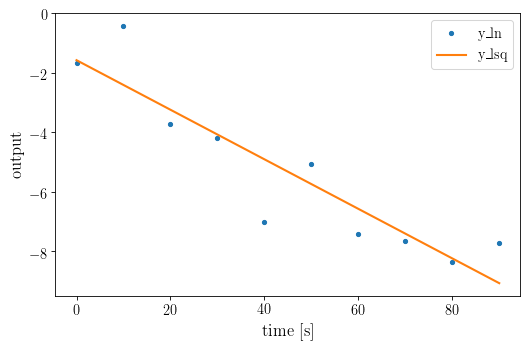

In [118]:
fig, ax = plt.subplots()
ax.plot(time, y_ln, '.', label='y\_ln')
ax.plot(time, y_lsq, '-', label='y\_lsq')
ax.set_xlabel('time [s]')
ax.set_ylabel('output')
_ = ax.legend()

Cette méthode peut sembler intéressante, mais une impulsion de Dirac est en pratique, difficile à mettre en oeuvre.

***

Ce chapitre n'étant qu'une introduction à l'identification, seuls le modèle ARX, pouvant être décrits par une régression linéaire, sera étudié.

## Application à l'identification des systèmes dynamiques

**Voir Longchamp 11.3**

## Identification paramétrique pour un modèle linéaire

**Voir Borne 19.3 (Principes, Méthode des moindres carrés, moindres carrés récursifs, moindres carrés pondérés, moindres carrés récursifs pondérés)**

## Séquence d'entrée utilisée pour l'identification

**Voir Borne 19.4**